In [79]:
"""
@description: 感知机对偶形式的实现
@author: Zhao Chengcheng
@date: 2020-11-2 9:38
"""
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def get_data(num):
    """
    @description: 生成数据(点)
    @param num: 生成点的个数
    @return data: 生成的点 [(x0, y0), (x1, y1), ……]
    @return label: 点的标签，-1 或 +1
    """
    data = [] # 数据
    label = [] # 标签
    x1 = np.random.normal(2, 0.8, num) # 反例,生成 num / 2 个点 
    x2 = np.random.normal(6, 0.8, num) # 正例
    for i in range(0, num, 2):
        data.append([x1[i], x1[i + 1]])
        label.append(-1)
        data.append([x2[i], x2[i + 1]])
        label.append(1)
    return data, label

In [86]:
def perceptron_duality(data, label, eta):
    """
    @description: 感知机对偶形式训练过程
    @param data: 数据
    @param label: 数据的标签，-1 或者 1
    @param eta: 学习率
    @return slope:斜率
    @return intercept: 截距
    """
    G = np.zeros([len(data), len(data)])    # Gram 矩阵
    α = np.zeros(len(data)) # 
    b = 0
    for i in range(0, len(data)):
        for j in range(0, len(data)):
            G[i][j] = data[i][0] * data[j][0] + data[i][1] * data[j][1] # 计算 Gram 矩阵
    separated = False   # 标记是否完全分离
    while not separated:
        separated = True
        for i in range(0, len(data)):   # 遍历训练集，每次取出点 (data[i][0], data[i][1])
            sum = 0
            for j in range(0, len(data)):   # 计算 ∑(α*yj*xj)的值，相当于原始形式中的 w
                sum += α[j] * label[j] * G[j][i]
            if (sum + b) * label[i] <= 0:   # 该点没有分离
                α[i] += eta # 更新 α 的值
                b += eta * label[i] # 更新 b 的值
                separated = False # 置回标记
    w = [0., 0.]    # w[0] * x + w[1] * y + b = 0
    for i in range(0, len(α)): # 求出 w 的值
        w[0] += α[i] * label[i] * data[i][0]
        w[1] += α[i] * label[i] * data[i][1]
    slope = -w[0] / w[1]    # 斜率
    intercept = -b / w[1]   # 截距
    return slope, intercept

In [87]:
def plot(data, label, slope, intercept):
    """
    画出点和超平面（直线）
    @param data: 点的坐标
    @param label: 点的标签
    @param slope: 直线的斜率
    @param intercept: 直线的纵截距
    """
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体
    plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号
    plt.xlabel('X')
    plt.ylabel('Y')
    area = np.pi * 2 ** 2 # 点的面积

    data_mat = np.array(data)
    X = data_mat[:, 0]
    Y = data_mat[:, 1]
    for i in range(len(label)):
        if label[i] > 0:
            plt.scatter(X[i].tolist(), Y[i].tolist(), s=area, color='red') # 画点
        else:
            plt.scatter(X[i].tolist(), Y[i].tolist(), s=area, color='green')
    # 根据斜率和截距画直线
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals)
    plt.show()

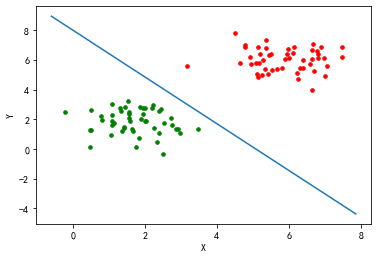

In [91]:
data, label = get_data(100)
slope, intercept = perceptron_duality(data, label, 1)
plot(data, label, slope, intercept)